In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from matplotlib import pyplot as plt

In [2]:
network = dict()

with open(f'dataverse_files/Sponsors.txt') as sponsor_file:
    with open(f'dataverse_files/Cosponsors.txt') as cosponsor_file:
        for sponsor_line, cosponsor_line in zip(sponsor_file, cosponsor_file):
            sponsor_line = sponsor_line[:-1]
            sponsor_id = int(sponsor_line) if sponsor_line != 'NA' else None
            cosponsor_line = cosponsor_line[:-1]
            cosponsor_ids = (int(c) for c in cosponsor_line.split(' ')) if cosponsor_line != 'NA' else ()

            if sponsor_id and sponsor_id not in network:
                network[sponsor_id] = set()

            for cosponsor_id in cosponsor_ids:
                if cosponsor_id and cosponsor_id not in network:
                    network[cosponsor_id] = set()

                if sponsor_id: network[sponsor_id].add(cosponsor_id)

            

In [3]:
G = nx.DiGraph()

for node, neighbors in network.items():
    G.add_node(node)
    G.add_edges_from((node, neighbor) for neighbor in neighbors)


In [8]:

nx.draw(G, with_labels=True)
plt.show()

<BarContainer object of 2104 artists>

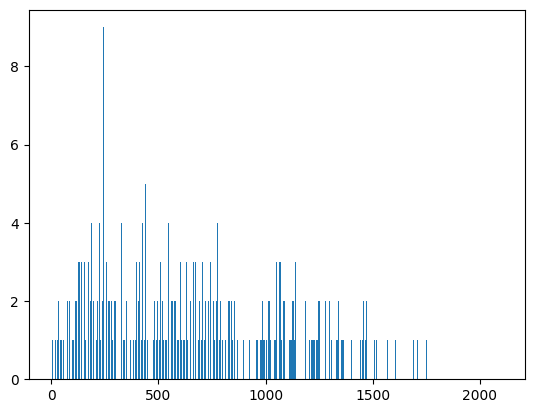

In [5]:
bins = nx.degree_histogram(G)
plt.bar(list(range(len(bins))), bins)

In [6]:
adjacency_matrix = nx.adjacency_matrix(G).todense().astype(bool)
(adjacency_matrix == adjacency_matrix.T).all()

False

In [7]:
# Open the file in write binary mode
with open('adjacency_matrix.bin', 'wb') as fout:
    # Write the binary data to the file
    fout.write(adjacency_matrix)